# The Movie DataBase  Revenue Prediction

# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model** to Analyse and to **Predit the Movie DataBase  Revenue Prediction**  using **Regression Analysis** with **Python**.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
import pyodbc
import warnings
warnings.filterwarnings("ignore")

In [286]:
path1 ="train.csv"
path2 ="test.csv"
class DataFrame_Loader():

    
    def __init__(self):
        
        print("Loadind DataFrame")
        
    def load_train_csv(self,path1,path2):
        dftrain = pd.read_csv(path1)
        dftest = pd.read_csv(path2)
        return dftrain,dftest

In [287]:
load= DataFrame_Loader()

Loadind DataFrame


In [288]:
dftrain,dftest = load.load_train_csv(path1,path2)
dftrain.shape,dftest.shape

((3000, 23), (4398, 22))

In [289]:
dftrain.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [290]:
dftest.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


# What's the Challenge


I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.


**Understand the problem :-**

          We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
**Univariable study      :-**

          We'll just focus on the dependent variable ('CLV') and try to know a little bit more about it.
**Multivariate study     :-**

          We'll try to understand how the dependent variable and independent variables relate.
**Basic cleaning         :-**

          We'll clean the dataset and handle the missing data, outliers and categorical variables.
**Doing All with Function       :-**

          We'll check some of the satistical Analysis by creating some Customized function, to make the analysis what we want.


# Exploratory Data Analysis

In [4]:
class DataFrame_Information():
    

    def __init__(self):
        
        print("Attribute Information object created")
        
        
        
    def Attribute_information(self,df):
        
        """
        This method will give us a basic
        information of the dataframe like
        Count of Attributes,Count of rows,
        Numerical Attributes, Categorical 
        Attributes, Factor Attributes etc..
        """
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        """
        It is a Private method, so it cannot 
        be accessed by object outside the 
        class. This function will give us 
        a basic information like count 
        of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    
    def Agg_Tabulation(self,data):
        
        
        """
        This method is a extension of 
        schema will gives the aditional 
        information about the data
        like Entropy value, Missing 
        Value Percentage and some observations
        """
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __iqr(self,x):
        
        
        """
        It is a private method which 
        returns you interquartile Range
        """
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __outlier_count(self,x):
        
        
        """
        It is a private method which 
        returns you outlier present
        in the interquartile Range
        """
        upper_out = x.quantile(q=0.75) + 1.5 * self.__iqr(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__iqr(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

    def num_count_summary(self,df):
        
        
        """
        This method will returns 
        you the information about
        numerical attributes like
        Positive values,Negative Values
        Unique count, Zero count 
        positive and negative inf-
        nity count and count of outliers
        etc 
        
        """
        
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__outlier_count(df_num[c])
            i = i+1
        return data_info_num
    
    def statistical_summary(self,df):
        
        
        """
        This method will returns 
        you the varoius percentile
        of the data including count 
        and mean
        """
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num

In [5]:
Info = DataFrame_Information()

Attribute Information object created


In [6]:
Info.Attribute_information(dftrain)

,value
No of observation,3000
No of Variables,23
No of Numerical Variables,5
No of Factor Variables,0
No of Categorical Variables,18
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [7]:
Info.Attribute_information(dftest)

,value
No of observation,4398
No of Variables,22
No of Numerical Variables,4
No of Factor Variables,0
No of Categorical Variables,18
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [8]:
Info.Agg_Tabulation(dftrain)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,id,int64,0,3000,0.000000,1,2,3,11.55
1,belongs_to_collection,object,2396,422,79.866667,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,8.49
2,budget,int64,0,406,0.000000,14000000,40000000,3300000,6.03
3,genres,object,7,872,0.233333,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]",7.93
4,homepage,object,2054,941,68.466667,NaN,NaN,http://sonyclassics.com/whiplash/,9.87
5,imdb_id,object,0,3000,0.000000,tt2637294,tt0368933,tt2582802,11.55
6,original_language,object,0,36,0.000000,en,en,en,1.15
7,original_title,object,0,2975,0.000000,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,11.53
8,overview,object,8,2992,0.266667,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",11.55
9,popularity,float64,0,2999,0.000000,6.57539,8.24889,64.3,11.55


In [9]:
Info.Agg_Tabulation(dftest)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,id,int64,0,4398,0.000000,3001,3002,3003,12.10
1,belongs_to_collection,object,3521,556,80.059118,"[{'id': 34055, 'name': 'Pokémon Collection', '...",NaN,NaN,8.91
2,budget,int64,0,511,0.000000,0,88000,0,6.08
3,genres,object,16,1101,0.363802,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...","[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",8.03
4,homepage,object,2978,1402,67.712597,http://www.pokemon.com/us/movies/movie-pokemon...,NaN,NaN,10.44
5,imdb_id,object,0,4398,0.000000,tt1226251,tt0051380,tt0118556,12.10
6,original_language,object,0,39,0.000000,ja,en,en,1.16
7,original_title,object,0,4353,0.000000,ディアルガVSパルキアVSダークライ,Attack of the 50 Foot Woman,Addicted to Love,12.08
8,overview,object,14,4383,0.318327,Ash and friends (this time accompanied by newc...,When an abused wife grows to giant size becaus...,Good-natured astronomer Sam is devastated when...,12.10
9,popularity,float64,0,4398,0.000000,3.85153,3.55979,8.08519,12.10


In [10]:
Info.num_count_summary(dftrain)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
id,0.0,3000.0,0.0,3000.0,0.0,0.0,0.000000,0.0
budget,0.0,2188.0,812.0,406.0,0.0,0.0,0.000000,249.0
popularity,0.0,3000.0,0.0,2999.0,0.0,0.0,0.000000,70.0
runtime,0.0,2986.0,12.0,140.0,0.0,0.0,0.000667,126.0
revenue,0.0,3000.0,0.0,2850.0,0.0,0.0,0.000000,315.0


In [11]:
Info.num_count_summary(dftest)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
id,0.0,4398.0,0.0,4398.0,0.0,0.0,0.00000,0.0
budget,0.0,3187.0,1211.0,511.0,0.0,0.0,0.00000,376.0
popularity,0.0,4398.0,0.0,4398.0,0.0,0.0,0.00000,131.0
runtime,0.0,4385.0,9.0,156.0,0.0,0.0,0.00091,152.0


In [13]:
Info.statistical_summary(dftrain)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
id,3000.0,1.500500e+03,8.661697e+02,1.000000,7.507500e+02,1.500500e+03,2.250250e+03,3.000000e+03,300.900000,2.700100e+03,2.850050e+03
budget,3000.0,2.253133e+07,3.702609e+07,0.000000,0.000000e+00,8.000000e+06,2.900000e+07,3.800000e+08,0.000000,6.500000e+07,9.500000e+07
popularity,3000.0,8.463274e+00,1.210400e+01,0.000001,4.018053e+00,7.374861e+00,1.089098e+01,2.943370e+02,1.298088,1.413547e+01,1.683931e+01
runtime,2998.0,1.078566e+02,2.208643e+01,0.000000,9.400000e+01,1.040000e+02,1.180000e+02,3.380000e+02,87.000000,1.340000e+02,1.470000e+02
revenue,3000.0,6.672585e+07,1.375323e+08,1.000000,2.379808e+06,1.680707e+07,6.891920e+07,1.519558e+09,172935.400000,1.768968e+08,3.012438e+08


In [12]:
Info.statistical_summary(dftest)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
id,4398.0,5.199500e+03,1.269738e+03,3001.000000,4100.250000,5.199500e+03,6.298750e+03,7.398000e+03,3440.700000,6.958300e+03,7.178150e+03
budget,4398.0,2.264929e+07,3.689991e+07,0.000000,0.000000,7.450000e+06,2.800000e+07,2.600000e+08,0.000000,6.500000e+07,1.000000e+08
popularity,4398.0,8.550230e+00,1.220901e+01,0.000001,3.895186,7.482241e+00,1.093852e+01,5.474883e+02,1.234044,1.463610e+01,1.811405e+01
runtime,4394.0,1.076222e+02,2.105829e+01,0.000000,94.000000,1.040000e+02,1.180000e+02,3.200000e+02,87.000000,1.330000e+02,1.450000e+02


# Data Preprocessing & Feature Engineering

In [161]:
class DataFrame_Preprocessor():
    

    def __init__(self):
        
        print("Preprocessor object created")
        
    
    
    def Split_DateMonthYear(self,train):
        
        
        """
        This method helps
        to Split the columns
        into seperate date,
        month and year
        """
        
        train['release_date'] = pd.to_datetime(train['release_date'])
        
        train['Year']=train['release_date'].dt.year
        
        train['Month']=train['release_date'].dt.month
        
        train['Day']=train['release_date'].dt.day
        
        return train
    
    
    def dropper(self,x):
        
        """
        This method helps
        to drop the columns
        in our original 
        dataframe which is 
        available in the 
        col_list and return 
        us final dataset
        """
        
        col_list = ['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'release_date', 'poster_path', 'tagline', 'title']
        drop_cols = ['id', 'homepage', 'imdb_id', 'original_title', 'spoken_languages', 'overview', 'poster_path', 'tagline', 'title', 'crew']
        data=[]
        
        for i in x.columns:
            
            if i not in drop_cols:
                
                data.append(i)
                
        return x[data]
    
    def __get_names(self,x, col):
        
        
        names = []
        for item in x:
            if col=='crew':
                if item['job']=='Director':
                    names.append(item['name'])
            elif col=='cast':
                if item['order'] in (0, 1, 2):
                    names.append(item['name'])
            else:
                names.append(item['name'])
        return names
    
    
    def preparator(self,train):
        
        """
        This methods helps
        to convert json columns 
        into list
        """
        
        dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
        
        for col in dict_cols:
            
            train[col] = train[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
            
        na_cols = train.columns[train.isna().any()].tolist()
        
        na_cols.remove('overview')
        
        na_cols.remove('runtime')
        
        train['runtime'].fillna(value=train['runtime'].median(), inplace=True)
        
        train['overview'].fillna(value='', inplace=True)
        
        for col in na_cols:
            
            train[col].fillna(value='', inplace=True)
            
        for col in dict_cols:
            
            train[col] = train[col].apply(lambda x: self.__get_names(x, col))

        return train
    
    
    def Most_Popular_Movies(self,train):
        
        most_popular_movies = train.sort_values('popularity', ascending=False).head(n=20)
        
        most_popular_movies['revenue(million)'] = most_popular_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
        
        most_popular_movies['budget(million)'] = most_popular_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
        
        most_popular_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]
        
        return most_popular_movies
    
    
    def Highest_Revenue_Movies(self,train):
    
        highest_revenue_movies = train.sort_values('revenue', ascending=False).head(n=20)

        highest_revenue_movies['revenue(million)'] = highest_revenue_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions

        highest_revenue_movies['budget(million)'] = highest_revenue_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions

        highest_revenue_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

        return highest_revenue_movies
    
    
    def Highest_Budget_Movies(self,train):

        highest_budget_movies = train.sort_values('budget', ascending=False).head(n=20)

        highest_budget_movies['revenue(million)'] = highest_budget_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions

        highest_budget_movies['budget(million)'] = highest_budget_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions

        highest_budget_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

        return highest_budget_movies
    
    
    def Most_Profit_Movies(self,train):


        most_profit_movies = train.copy()

        most_profit_movies['revenue(million)'] = most_profit_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions

        most_profit_movies['budget(million)'] = most_profit_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions

        most_profit_movies['profit(million)'] = most_profit_movies['revenue(million)']-most_profit_movies['budget(million)']

        most_profit_movies = most_profit_movies.sort_values('profit(million)', ascending=False).head(n=20)

        most_profit_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)', 'profit(million)']]

        return most_profit_movies
    
    
    def Movies_Information(self,train):
    
    
        data_explore_enc = train['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')

        data_explore_genres = pd.concat([train, data_explore_enc], axis=1)

        genres = data_explore_enc.columns

        genres_info = []

        for col in genres:

            total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity=0, 0, 0, 0, 0, 0

            total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()

            total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()

            median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()

            total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()

            median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()

            median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()

            genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity])

        genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity'])

        genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)

        genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)

        genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)

        genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000) 

        genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity']]

        return genres_info



In [162]:
Preprocessor = DataFrame_Preprocessor()

Preprocessor object created


In [133]:
dftrain = Preprocessor.Split_DateMonthYear(dftrain)
dftrain.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,Year,Month,Day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5


In [134]:
dftrain = Preprocessor.dropper(dftrain)
dftrain.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,Year,Month,Day
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5


In [135]:
dftrain = Preprocessor.preparator(dftrain)
dftrain.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,Year,Month,Day
0,14000000,[Comedy],en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,[English],Released,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,2015,2,20
1,40000000,"[Comedy, Drama, Family, Romance]",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[United States of America],113.0,[English],Released,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,2004,8,6
2,3300000,[Drama],en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,[English],Released,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,2014,10,10
3,1200000,"[Thriller, Drama]",hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,[],[India],122.0,"[English, हिन्दी]",Released,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],16000000,2012,3,9
4,0,"[Action, Thriller]",ko,마린보이,Marine Boy is the story of a former national s...,1.148070,[],[South Korea],118.0,[한국어/조선말],Released,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]",[Jong-seok Yoon],3923970,2009,2,5


In [138]:
most_popular_movies = Preprocessor.Most_Popular_Movies(dftrain)
most_popular_movies.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,Year,Month,Day,revenue(million),budget(million)
518,149000000,"[Action, Adventure, Fantasy]",en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,"[Dune Entertainment, Atlas Entertainment, Warn...",[United States of America],141.0,"[Deutsch, English]",Released,"[dc comics, hero, greek mythology, island, wor...",[],[],820580447,2017,5,30,820,149
684,160000000,"[Family, Fantasy, Romance]",en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,"[Walt Disney Pictures, Mandeville Films]","[United Kingdom, United States of America]",129.0,[English],Released,"[france, magic, castle, fairy tale, musical, c...","[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],1262886337,2017,3,16,1262,160
1695,34000000,"[Action, Crime]",en,Baby Driver,After being coerced into working for a crime b...,228.032744,"[Big Talk Productions, TriStar Pictures, Media...","[United Kingdom, United States of America]",113.0,[English],Released,"[robbery, atlanta, music, crime boss, romance,...","[Ansel Elgort, Lily James, Kevin Spacey]",[Edgar Wright],224511319,2017,6,28,224,34
2326,58000000,"[Action, Adventure, Comedy]",en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,"[Twentieth Century Fox Film Corporation, Marve...",[United States of America],108.0,[English],Released,"[anti hero, mercenary, marvel comic, superhero...","[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],783112979,2016,2,9,783,58
2126,200000000,"[Action, Adventure, Comedy, Science Fiction]",en,Guardians of the Galaxy Vol. 2,The Guardians must fight to keep their newfoun...,185.330992,"[Walt Disney Pictures, Marvel Studios]",[United States of America],137.0,[English],Released,"[sequel, superhero, based on comic, misfit, sp...","[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],863416141,2017,4,19,863,200


In [144]:
highest_revenue_movies = Preprocessor.Highest_Revenue_Movies(dftrain)
highest_revenue_movies.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,Year,Month,Day,revenue(million),budget(million)
1126,220000000,"[Science Fiction, Action, Adventure]",en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,"[Paramount Pictures, Marvel Studios]",[United States of America],143.0,[English],Released,"[new york, shield, marvel comic, superhero, ba...","[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],1519557910,2012,4,25,1519,220
1761,190000000,[Action],en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,"[Universal Pictures, Original Film, Fuji Telev...","[Japan, United States of America]",137.0,[English],Released,"[car race, speed, revenge, suspense, car, race...","[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],1506249360,2015,4,1,1506,190
2770,280000000,"[Action, Adventure, Science Fiction]",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],141.0,[English],Released,"[marvel comic, sequel, superhero, based on com...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],1405403694,2015,4,22,1405,280
684,160000000,"[Family, Fantasy, Romance]",en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,"[Walt Disney Pictures, Mandeville Films]","[United Kingdom, United States of America]",129.0,[English],Released,"[france, magic, castle, fairy tale, musical, c...","[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],1262886337,2017,3,16,1262,160
2322,195000000,"[Action, Science Fiction, Adventure]",en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,"[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],154.0,[English],Released,"[moon, spacecraft, traitor, bodyguard, alien p...","[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],1123746996,2011,6,28,1123,195


In [147]:
highest_budget_movies = Preprocessor.Highest_Budget_Movies(dftrain)
highest_budget_movies.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,Year,Month,Day,revenue(million),budget(million)
2135,380000000,"[Adventure, Action, Fantasy]",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],136.0,"[English, Español]",Released,"[sea, captain, mutiny, sword, prime minister, ...","[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],1045713802,2011,5,14,1045,380
2209,300000000,"[Adventure, Fantasy, Action]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.363664,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],169.0,[English],Released,"[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],961000000,2007,5,19,961,300
2770,280000000,"[Action, Adventure, Science Fiction]",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],141.0,[English],Released,"[marvel comic, sequel, superhero, based on com...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],1405403694,2015,4,22,1405,280
1425,270000000,"[Adventure, Fantasy, Action, Science Fiction]",en,Superman Returns,Superman returns to discover his 5-year absenc...,13.284712,"[DC Comics, Legendary Pictures, Warner Bros., ...",[United States of America],154.0,"[English, Français, Deutsch]",Released,"[saving the world, dc comics, invulnerability,...","[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],391081192,2006,6,28,391,270
1270,260000000,"[Action, Adventure, Science Fiction]",en,John Carter,"John Carter is a war-weary, former military ca...",14.670353,[Walt Disney Pictures],[United States of America],132.0,[English],Released,"[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],284139100,2012,3,7,284,260


In [150]:
most_profit_movies = Preprocessor.Most_Profit_Movies(dftrain)
most_profit_movies.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,...,Keywords,cast,crew,revenue,Year,Month,Day,revenue(million),budget(million),profit(million)
1761,190000000,[Action],en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,"[Universal Pictures, Original Film, Fuji Telev...","[Japan, United States of America]",137.0,[English],...,"[car race, speed, revenge, suspense, car, race...","[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],1506249360,2015,4,1,1506,190,1316
1126,220000000,"[Science Fiction, Action, Adventure]",en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,"[Paramount Pictures, Marvel Studios]",[United States of America],143.0,[English],...,"[new york, shield, marvel comic, superhero, ba...","[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],1519557910,2012,4,25,1519,220,1299
2770,280000000,"[Action, Adventure, Science Fiction]",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],141.0,[English],...,"[marvel comic, sequel, superhero, based on com...","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],1405403694,2015,4,22,1405,280,1125
684,160000000,"[Family, Fantasy, Romance]",en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,"[Walt Disney Pictures, Mandeville Films]","[United Kingdom, United States of America]",129.0,[English],...,"[france, magic, castle, fairy tale, musical, c...","[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],1262886337,2017,3,16,1262,160,1102
2322,195000000,"[Action, Science Fiction, Adventure]",en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,"[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],154.0,[English],...,"[moon, spacecraft, traitor, bodyguard, alien p...","[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],1123746996,2011,6,28,1123,195,928


In [153]:
movies_information = Preprocessor.Movies_Information(dftrain)
movies_information.head()

,genres,movies_count,total_budget,median_budget,total_revenue,median_revenue,median_popularity,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million)
0,Comedy,1028,19614445621,8000000.0,62580263721,18809184.0,6.905488,19614,8.0,62580,18.0
1,Drama,1531,25733940425,6000000.0,69516699191,11293663.0,6.793972,25733,6.0,69516,11.0
2,Family,260,11048890059,24500000.0,36113426664,57470029.5,8.416440,11048,24.0,36113,57.0
3,Romance,571,8944336886,5500000.0,30094559216,14016568.0,6.370105,8944,5.0,30094,14.0
4,Thriller,789,20873192826,13000000.0,53917610066,21890845.0,8.371005,20873,13.0,53917,21.0


# Train Test Split

In [209]:
X = data.drop(columns=['revenue'], axis=1).copy()
y = data['revenue'].copy()
X.shape, y.shape

((3000, 22), (3000,))

In [210]:
from collections import Counter
top_30_values = dict()

list_of_genres_names = list(X['genres'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_genres = (Counter([i for j in list_of_genres_names for i in j]).most_common(30))
top_30_values['genres'] = [x for x, y in top_30_genres]

list_of_production_companies_names = list(X['production_companies'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_production_companies = (Counter([i for j in list_of_production_companies_names for i in j]).most_common(30))
top_30_values['production_companies'] = [x for x, y in top_30_production_companies]

list_of_production_countries_names = list(X['production_countries'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_production_countries = (Counter([i for j in list_of_production_countries_names for i in j]).most_common(30))
top_30_values['production_countries'] = [x for x, y in top_30_production_countries]

list_of_keywords = list(X['Keywords'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_keywords = (Counter([i for j in list_of_keywords for i in j]).most_common(30))
top_30_values['Keywords'] = [x for x, y in top_30_keywords]

list_of_cast_names = list(X['cast'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x if i['order'] in (0, 1, 2, 3)] if x != {} else []).values)
top_30_cast = (Counter([i for j in list_of_cast_names for i in j]).most_common(30))
top_30_values['cast'] = [x for x, y in top_30_cast]

In [211]:
drop_cols = ['id', 'homepage', 'imdb_id', 'original_title', 'spoken_languages', 'overview', 'poster_path', 'tagline', 'title', 'crew']
encoded_cols = []

In [212]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, MultiLabelBinarizer
class CustomAttr(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X['is_sequel'] = X['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

            
            X['release_date']= X['release_date'].apply(lambda x: self.modify_date(x))
            
            X['release_year'] = pd.DatetimeIndex(X['release_date']).year

            
            X['release_month'] = pd.DatetimeIndex(X['release_date']).month

            
            X['release_day'] = pd.DatetimeIndex(X['release_date']).day

            
            X['release_dow'] = pd.DatetimeIndex(X['release_date']).dayofweek

            
            X = X.drop(['belongs_to_collection', 'release_date'], axis=1)

            return X
        except Exception as e:
            print("CustomAttr: Exception caught: {}".format(e))

    @staticmethod
    def modify_date(x):
        try:
            if x is np.nan:
                x='01/01/00'
            x=str(x)
            year=x.split('/')[2]
            if int(year)<20:
                return x[:-2]+'20'+year
            else:
                return x[:-2]+'19'+year
        except Exception as e:
            print("CustomAttr: modify_date() function -  exception caught for date {}: {}".format(x,e))

In [213]:
class JSONHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlbs = dict()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for col in list(X.columns):
            try:
                X[col] = X[col].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
                X[col] = X[col].apply(lambda x: self.get_names(x, col))
                if not (col in self.mlbs.keys()):
                    self.mlbs[col] = MultiLabelBinarizer()
                    X_enc = pd.DataFrame(self.mlbs[col].fit_transform(X[col]),columns=self.mlbs[col].classes_, 
                                         index=X.index)
                    encoded_cols.extend(list(self.mlbs[col].classes_))
                else:
                    X_enc = pd.DataFrame(self.mlbs[col].transform(X[col]),columns=self.mlbs[col].classes_, 
                                         index=X.index)
                X = X.drop(col, axis=1)
                X = pd.concat([X, X_enc], axis=1)
                print("{}, {}, {}".format(col, X_enc.shape, X.shape))

            except Exception as e:
                print("JSONHandler: Exception caught for {}: {}".format(col,e))
        return X
       

    @staticmethod
    def get_names(x, col):
        names = []
        try:
            names = [item['name'] for item in x if item['name'] in top_30_values[col]]
            if len(names)==0:
                names.append('other_'+col)
            return names
        except Exception as e:
            print("JSONHandler: get_names() function -  exception caught {}: {}".format(x,e))

In [218]:
X.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
dtype: int64

In [224]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('scaler', PowerTransformer())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_enc', OneHotEncoder(handle_unknown='ignore'))])

pre_process = ColumnTransformer([('drop_cols', 'drop', drop_cols),
                                 ('add_attr', CustomAttr(), ['belongs_to_collection', 'release_date']),
                                 ('num_process', num_pipeline, ['budget', 'popularity', 'runtime']),
                                 ('encoder', cat_pipeline, ['original_language', 'status']),
                                 ('custom_step', JSONHandler(), ['genres', 'production_companies', 'production_countries', 'Keywords', 'cast'])], remainder='passthrough')

X_transformed = pre_process.fit_transform(X)

genres, (3000, 21), (3000, 25)
production_companies, (3000, 31), (3000, 55)
production_countries, (3000, 31), (3000, 85)
Keywords, (3000, 31), (3000, 115)
cast, (3000, 31), (3000, 145)


In [225]:
X_transformed = pd.DataFrame(X_transformed)
X_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1.0,2015.0,2.0,20.0,4.0,0.543782,0.020116,-0.665716,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2004.0,8.0,6.0,4.0,0.880008,0.297363,0.244661,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2014.0,10.0,10.0,4.0,0.149294,3.422487,-0.117052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,2012.0,3.0,9.0,4.0,-0.086318,-0.766481,0.648071,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,2009.0,2.0,5.0,3.0,-1.501705,-1.575729,0.469218,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [226]:
class DataFrame_Categorical_Imputer():
    

    def __init__(self):
        
        
        print("Imputation object created")
        
        
        
    def fit(self, data):
        
        
        """
        This method will fit 
        impute mode value for 
        all missing categoriical 
        variables
        """
        

        self.fill = pd.Series([data[column].\
                        value_counts().index[0]
            if data[column].dtype == np.dtype('O') else \
                 data[column].mode() for column in data],
            index=data.columns)

        return self
    
    

    def transform(self, data):
        
        """
        This method will transform
        the fitted function and 
        return the DataFrame
        """
        
        return data.fillna(self.fill)

In [227]:
impute = DataFrame_Categorical_Imputer()
impute.fit(X_transformed)
X=impute.transform(X_transformed)
X.sample(n=5)

Imputation object created


,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
1293,0.0,2008.0,2.0,1.0,4.0,0.880008,0.095449,-0.804125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,1.0,1989.0,7.0,28.0,4.0,0.255313,0.218533,-0.344732,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2106,0.0,1939.0,3.0,2.0,3.0,-0.254983,0.254444,-0.527821,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2417,0.0,1971.0,6.0,29.0,1.0,0.125765,0.833397,-0.344732,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,0.0,2010.0,1.0,24.0,6.0,-0.036948,-0.943395,-0.804125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2400, 191), (600, 191), (2400,), (600,))

# Model Selection using KFold CrossValidation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

        
        (i)    That k-fold cross validation is a procedure used to estimate the skill of the model on new data.

        (ii)   There are common tactics that you can use to select the value of k for your dataset.

        (iii)  There are commonly used variations on cross-validation such as stratified and repeated that are available in scikit-                 learn.


In [235]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

class Model_Selector():
    
    

    def __init__(self):
        print("Model Selector object created")
        
    """
    This method helps to select
    the best machine learning 
    model to compute the relationship
    betweem i/p and d/p variable
    
    """    
        
        
    def Regression_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LinearRegression()))
        models.append(("RF", RandomForestRegressor()))
        models.append(("KNN", KNeighborsRegressor()))
        models.append(("CART", DecisionTreeRegressor()))
        models.append(("XGB", XGBRegressor()))
        result = []
        names = []
        scoring = 'r2'
        seed = 42
        
        

        for name, model in models:
            kfold = KFold(n_splits = 5, random_state =seed)
            cv_results = cross_val_score(model, X_train,\
                    y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
            
            
            
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [236]:
MS = Model_Selector()

Model Selector object created


('LR', -5.037200407261473e+18, 3.014382900756609e+18)
('RF', 0.6782411747950545, 0.05171759281953513)
('KNN', 0.27240696943598797, 0.04117412071157193)
('CART', 0.419101431950519, 0.08976059643457651)
('XGB', 0.6548465888888678, 0.059627126900336086)


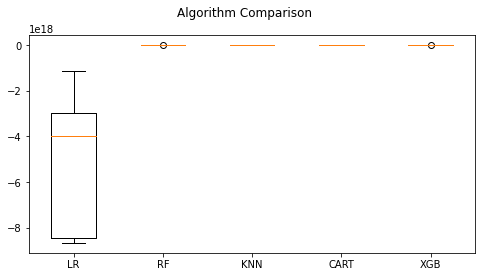

In [237]:
MS.Regression_Model_Selector(df)

# Data Modelling

In [262]:
class Data_Modelling():
    
    
    
    def __init__(self):
        
        print("Data Modelling Object Created")
    
        
    """
    Linear Regression has been 
    implemented from scratch
    """    
    class LinearRegression:

        def __init__(self, 
                     learning_rate, 
                     n_iters, 
                     weights, 
                     bias):
            
            self.learning_rate = 0.001
            self.n_iters = 1000
            self.weights = None
            self.bias = 0

        def fit(self, X, y):
            n_samples, n_features = X.shape


            self.weights = np.zeros(n_features)
            self.bias = 0

 
            for _ in range(self.n_iters):
                y_predicted = np.dot(X, self.weights) + self.bias

                dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * np.sum(y_predicted - y)


                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db


        def predict(self, X):
            y_approximated = np.dot(X, self.weights) + self.bias
            return y_approximated

        
        
    class Random_Forest():
        
        
        def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    random_state):
            
            self.n_estimators = 500
            self.max_depth = 5
            self.min_samples_split = 3
            self.min_samples_leaf = 3
            self.max_leaf_nodes = None
            self.bootstrap = True
            self.random_state = 29 

            
            print("Random Forest Object Created")
        
        def Random_Forest_Model(self,x_train,y_train):
        
            RF_Regressor = RandomForestRegressor(n_estimators = self.n_estimators,
                        max_depth = self.max_depth,
                        min_samples_split = self.min_samples_split,
                        min_samples_leaf = self.min_samples_leaf,
                        max_leaf_nodes = self.max_leaf_nodes,
                        bootstrap = self.bootstrap)

            RF_Regressor.fit(x_train,y_train)
        
            RF_pred=RF_Regressor.predict(X_test)

            RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test,RF_pred))

            RF_r2_score = r2_score(y_test,RF_pred)

            return RF_RMSE,RF_r2_score

            
    class Extreme_Gradient_Boosting():
        
        def __init__(self,n_estimators,
                    max_depth,
                    min_child_weight,
                    learning_rate,
                    Subsample,
                    Alpha,
                    Lamda,
                    random_state):
            
            self.n_estimators = 500
            self.max_depth = 5
            self.min_child_weight = 3
            self.learning_rate = 0.07
            self.Subsample = 0.7
            self.Alpha = 0
            self.Lamda = 1.5
            self.random_state = 29 

            
            print("Extreme Gradient Boosting Object Created")
            
            
        
        def Extreme_Gradient_Boosting_Model(self,x_train,y_train):

            XGB_Regressor = XGBRegressor(n_estimators = self.n_estimators,
                        learning_rate = self.learning_rate,
                        max_depth = self.max_depth,
                        min_child_weight = self.min_child_weight,
                        random_state = self.random_state,
                        Subsample = self.Subsample,
                        Alpha = self.Alpha,
                        Lamda = self.Lamda)

            XGB_Regressor.fit(x_train,y_train)
        
            XGB_pred=XGB_Regressor.predict(X_test)

            XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_test,XGB_pred))

            XGB_r2_score = r2_score(y_test,XGB_pred)

            return XGB_RMSE,XGB_r2_score

In [252]:
model = Data_Modelling().LinearRegression(0.001,1000,None,0)

Data Modelling Object Created


In [263]:
RF_model = Data_Modelling().Random_Forest(500,5,3,3,None,True,29)
XGB_model = Data_Modelling().Extreme_Gradient_Boosting(500,5,3,0.07,0.7,0,1.5,29)

Data Modelling Object Created
Random Forest Object Created
Data Modelling Object Created
Extreme Gradient Boosting Object Created


In [254]:
XGB_Model = XGB_model.Extreme_Gradient_Boosting_Model(X_train,y_train)
XGB_Model

[15:54:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { Alpha, Lamda, Subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




(69981750.16011615, 0.7088302213769677)

In [264]:
RF_Model = RF_model.Random_Forest_Model(X_train,y_train)
RF_Model

(69354795.88260114, 0.7140239303188558)

 # Model HyperParameter Tuning
 
 
 The parameters, called hyperparameters, that define the performance of the machine learning algorithm (model), depends on the problem we are trying to solve. Thus, they need to be configured accordingly. This process of finding the best set of parameters is called hyperparameter optimization.
 
 
 The grid search is an exhaustive search through a set of manually specified set of values of hyperparameters. It means you have a set of models (which differ from each other in their parameter values, which lie on a grid). What you do is you then train each of the models and evaluate it using cross-validation. You then select the one that performed best.

In [268]:
from sklearn.model_selection import RandomizedSearchCV
class Model_Regression_HyperParameter_Tuning():
    

    def __init__(self):
        
        
        print("HyperParameter_Tuning object created")
        
    class XGB_Regressor_HyperParameter_Tuning():
    

        def __init__(self):

            print("XGB HyperParameter_Tuning object created")


        def Fit_XGB_HyperParameter_Tuner(self,dftrain):
            

            xgb_Reg = XGBRegressor(tree_method = "exact", predictor = "cpu_predictor",
                                        objective = "reg:squarederror")


            parameters = {"learning_rate": [0.1, 0.01, 0.001],
                           "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
                           "max_depth": [2, 4, 7, 10],
                           "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
                           "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
                           "reg_alpha": [0, 0.5, 1],
                           "reg_lambda": [1, 1.5, 2, 3, 4.5],
                           "min_child_weight": [1, 3, 5, 7],
                           "n_estimators": [100, 250, 500, 1000]}


            xgb_rscv = RandomizedSearchCV(xgb_Reg, param_distributions = parameters, scoring = "r2",
                                         cv = 3, random_state = 29 )

            # Fit the model
            model_xgboost = xgb_rscv.fit(X_train, y_train)
            return model_xgboost
        
        
        def XGB_Get_Best_Prams(self):
            
            print("Learning Rate: ", Xgb_model.best_estimator_.get_params()["learning_rate"])
            print("Gamma: ", Xgb_model.best_estimator_.get_params()["gamma"])
            print("Max Depth: ", Xgb_model.best_estimator_.get_params()["max_depth"])
            print("Subsample: ", Xgb_model.best_estimator_.get_params()["subsample"])
            print("Max Features at Split: ", Xgb_model.best_estimator_.get_params()["colsample_bytree"])
            print("Alpha: ", Xgb_model.best_estimator_.get_params()["reg_alpha"])
            print("Lamda: ", Xgb_model.best_estimator_.get_params()["reg_lambda"])
            print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",Xgb_model.best_estimator_.get_params()["min_child_weight"])
            print("Number of Trees: ", Xgb_model.best_estimator_.get_params()["n_estimators"])


        
        def get_Regressor_result(self,modelname,y_test):
            
            
            
            RF_pred = modelname.predict(X_test)
            
            RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test,RF_pred))
        
            RF_r2_score = r2_score(y_test,RF_pred)
        
            return RF_RMSE,RF_r2_score

        
        class RF_Regressor_HyperParameter_Tuning():
    

            def __init__(self):

                print("RF HyperParameter_Tuning object created")


            def Fit_RF_HyperParameter_Tuner(self,dftrain):
                
                

                param_grid = {"max_depth": [1, 3, 5, 7, 9, 10],
                              "min_samples_split": [1, 3, 10, 15, 20],
                              "min_samples_leaf": [1, 3, 5, 10],
                              "bootstrap": [True, False],
                              "criterion": ["mse", "mae"],
                              "n_estimators": [100, 250, 500, 1000]}

                Reg = RandomForestRegressor(random_state=29, n_jobs=-1)
                model = RandomizedSearchCV(Reg, param_grid, scoring = 'r2', cv=3)

                model.fit(X_train, y_train)

                return model

            def RF_Get_Best_Prams(self):
                
                
                

                print("n_estimators: ", RF_model.best_estimator_.get_params()["n_estimators"])
                print("Max Depth: ", RF_model.best_estimator_.get_params()["max_depth"])
                print("min_samples_split: ", RF_model.best_estimator_.get_params()["min_samples_split"])
                print("min_samples_leaf: ", RF_model.best_estimator_.get_params()["min_samples_leaf"])
                print("max_leaf_nodes: ", RF_model.best_estimator_.get_params()["max_leaf_nodes"])
                print("bootstrap: ", RF_model.best_estimator_.get_params()["bootstrap"])
                print("criterion: ",RF_model.best_estimator_.get_params()["criterion"])

            def Evaluation_Result(self,modelname,y_test):
                
                XGB_pred = modelname.predict(X_test)
                
                XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_test,XGB_pred))

                XGB_r2_score = r2_score(y_test,XGB_pred)

                return XGB_RMSE,XGB_r2_score

In [269]:
HP_XGB = Model_Regression_HyperParameter_Tuning().XGB_Regressor_HyperParameter_Tuning()
HP_RF = Model_Regression_HyperParameter_Tuning().XGB_Regressor_HyperParameter_Tuning().RF_Regressor_HyperParameter_Tuning()

HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
RF HyperParameter_Tuning object created


In [270]:
Xgb_model = HP_XGB.Fit_XGB_HyperParameter_Tuner(df)
Xgb_model

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   param_distributions={'colsample_bytree': [0.

In [271]:
HP_XGB.XGB_Get_Best_Prams()

Learning Rate:  0.01
Gamma:  1.5
Max Depth:  7
Subsample:  0.7
Max Features at Split:  0.6
Alpha:  0
Lamda:  3
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  1000


In [272]:
HP_XGB.get_Regressor_result(Xgb_model,y_test)

(65474972.16314777, 0.7451249392877042)

In [273]:
RF_model = HP_RF.Fit_RF_HyperParameter_Tuner(df)
RF_model

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=29),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 3, 5, 7, 9, 10],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [1, 3, 10, 15, 20],
                                        'n_estimators': [100, 250, 500, 1000]},
                   scoring='r2')

In [274]:
HP_RF.RF_Get_Best_Prams()

n_estimators:  500
Max Depth:  9
min_samples_split:  20
min_samples_leaf:  5
max_leaf_nodes:  None
bootstrap:  True
criterion:  mae


In [275]:
HP_RF.Evaluation_Result(RF_model,y_test)

(69816939.76766548, 0.7102000441830076)